# Interactive labeling example
from: https://modal-python.readthedocs.io/en/latest/content/examples/interactive_labeling.html

In [1]:
# Import all necessary libraries
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

## Dataset
For our classifier, we load the digits dataset from scikit-learn.

In [2]:
n_initial = 100

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

## Initializing the learner
We initialize the active learner with the uncertainty sampling strategy and the classifier.

In [3]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

We set the number of queries we want to make to 20.

In [4]:
n_queries = 20

## The active learning loop

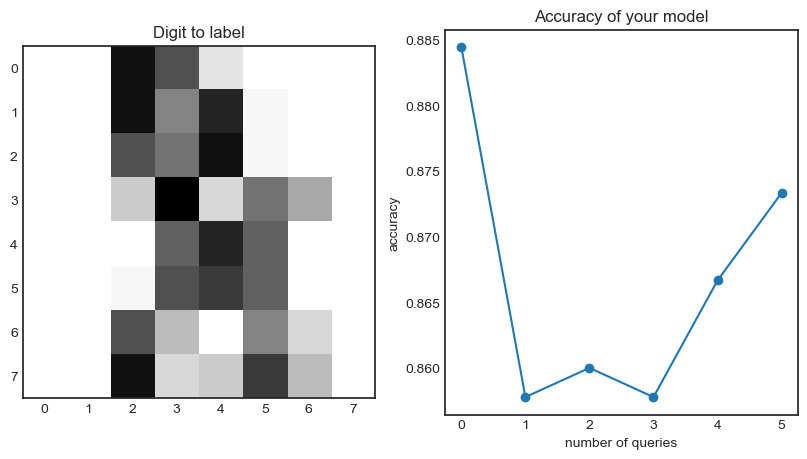

Which digit is this?


In [ ]:
# Initialize accuracy storage
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    # query for labels
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-v0_8-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(8, 8))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')

    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=int)
    # add new label to train set and retrain
    learner.teach(query_inst.reshape(1, -1), y_new)
    # pool update
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    # update the accuracy scores
    accuracy_scores.append(learner.score(X_test, y_test))

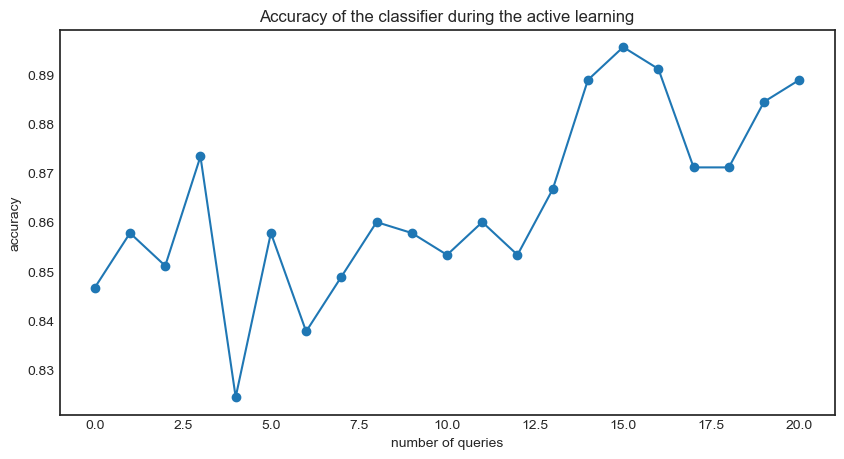

In [8]:
with plt.style.context('seaborn-v0_8-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()